---
title: "Assignment: Laboratory 1"
format: 
    html: default
    pdf: 
        margin: 0.5in
        papersize: a4
        toc: true
        toc-depth: 4
        number-sections: true
        highlight-style: github
---

# Context of this dataset
A biologist was worried about the potential health effects of music festivals. So, one year she went to the Download Music Festival (http://www.downloadfestival.co.uk) and measured the hygiene of 810 concert goers over the three days of the festival. In theory each person was measured on each day but because it was difficult to track people down, there were some missing data on days 2 and 3. Hygiene was measured using a technique that results in a score ranging between 0 (you smell like a rotting corpse) and 5 (you smell like sweet roses). Sanitation is not always great at these places, so this researcher predicted that personal hygiene would go down dramatically over the three days of the festival. The data file is called download.sav.

# Note
For this work, I used `python=3.10.14` and `pandas=2.2.2` as my primary tools, which align with my daily workflow. If you prefer a more modern experience (especially when reviewing the code), I’ve also rendered the output as an interactive HTML version, which you can access [here](https://aliceamamiya.github.io/educ8009/session03/assignment.html). The jupyter notebook of this assignment can be found [here](https://github.com/AliceAmamiya/educ8009/blob/main/session03/assignment.ipynb).

# Questions and Objectives
1. What do 1, 2, and 3 mean in variable “gender”? What are their percentages in the sample?
2. Draw a barplot of “gender” whose 𝑦-axis represents the percentage of each group.
3. Draw a histogram of “day_1”. Is there anything wrong with this variable?
4. How many cases have missing values for “day_2”?
5. (Extra credit) Exclude the outlier. In SPSS, you can follow the procedure below.
```
   - ⟨ Data ⟩ ⟶ ⟨ Select Cases ⟩
   - Select “If condition is satisfied” in ⟨ Select ⟩
   - ⟨ If ⟩
   - Double-click on the variable corresponding to “day_1” in the variable list
   - ⟨ <= ⟩ ⟶ ⟨ 5 ⟩ ⟶ ⟨ Continue ⟩ ⟶ ⟨ OK ⟩
   - Draw a histogram of “day_1” again in the same way as before.
```

In [1]:
from unittest.mock import inplace

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat

## Preparation

Before working on the lab work , I started with a quick EDA. 

In [2]:
df_download, metadata_download = pyreadstat.read_sav("./datasets/download.sav")

# A quick peek on the structure of the DataFrame. 
print('0. An overall description of this dataset: \n' + str(df_download.describe()) + '\n')
print('1. Shape - rows and columns: \n' + str(df_download.shape) + '\n') 
print('2. Variables (in SPSS) or column names: \n ' + str(df_download.columns) + '\n')
print('3. Missing values (if any): \n ' + str(df_download.isnull().sum()) + '\n')

0. An overall description of this dataset: 
         ticket_no      gender       day_1       day_2       day_3
count   810.000000  810.000000  810.000000  264.000000  123.000000
mean   3616.212346    1.769136    1.793358    0.960909    0.976504
std     610.241493    0.632679    0.944495    0.720780    0.710277
min    2111.000000    1.000000    0.020000    0.000000    0.020000
25%    3096.250000    1.000000    1.312500    0.410000    0.440000
50%    3620.500000    2.000000    1.790000    0.790000    0.760000
75%    4154.750000    2.000000    2.230000    1.350000    1.525000
max    4765.000000    3.000000   20.020000    3.440000    3.410000

1. Shape - rows and columns: 
(810, 5)

2. Variables (in SPSS) or column names: 
 Index(['ticket_no', 'gender', 'day_1', 'day_2', 'day_3'], dtype='object')

3. Missing values (if any): 
 ticket_no      0
gender         0
day_1          0
day_2        546
day_3        687
dtype: int64



From the output, it seems something going wrong with the column `day_1`. I'm sure I'll check it later. Besides, the column `gender` should be a categorical variable rather than an `int` and should be corrected: 

In [3]:
df_download['gender'] = df_download['gender'].astype('category')

## Question 1
> Q1a: What do 1, 2, and 3 mean in variable “gender”?

**Answer:** 

| Code | Label      |
|------|------------|
| 1    | Male       |
| 2    | Female     |
| 3    | Non-Binary |

**Solution:** 

I reached the mapping for categorical variables by accessing metadata from the given `sav` file by `pyreadstats`: 

In [4]:
print(metadata_download.variable_value_labels)

{'gender': {1.0: 'Male', 2.0: 'Female', 3.0: 'Non-binary'}}


*P.S. On another note, considering this is data from a music festival, should I assume that apart from the 90 individuals labeled themselves as ENBY, the terms "Female" and "Male" in the dataset include both cisgender and transgender individuals?*

> Q1b: What are their percentages in the sample?

**Answer:**

| Gender     | Count | Percentage |
|------------|-------|------------|
| Female     | 443   | 54.69%     |
| Male       | 277   | 34.20%     |
| Non-Binary | 90    | 11.11%     |

**Solution:**

In [5]:
# Calculating the Percentage
percentage = df_download['gender'].value_counts(normalize=True) * 100   # For percentage
print(percentage)

gender
2.0    54.691358
1.0    34.197531
3.0    11.111111
Name: proportion, dtype: float64


### Report the result (in a formal way)

And the results of Question 1a and 1b should be reported in a formal way: 

The total $N$ for ths dataset (for the study) was 810. The sample included the following gender groups: 54.69% male, 34.20% female and 11.11% of non-binary. 



## Question 2
> Draw a barplot of “gender” whose 𝑦-axis represents the percentage of each group.

**Answer:** 

See @fig-gender-counts

**Solution:**

C:\Users\Riko\AppData\Local\Temp\ipykernel_15292\2800231647.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gender_barplot.set_xticklabels(['Male', 'Female', 'Non-binary'])


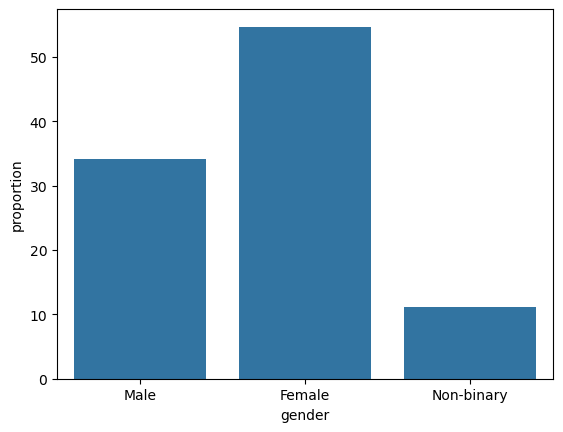

In [6]:
#| label: fig-gender-counts
#| fig-cap: "Count of Gender"
gender_barplot = sns.barplot(percentage)
gender_barplot.set_xticklabels(['Male', 'Female', 'Non-binary'])
plt.show()

## Question 3
> Draw a histogram of `day_1`. Is there anything wrong with this variable?

**Answer:**

See @fig-hist-day1. 

**Solution:**

From the EDA and the histogram shown below (see @fig-hist-day1), we can clearly identify an outlier with a "hygiene score" significantly higher than the others. Given that the score should range between 0 and 5, this could probability be a typo or some other thing we may have overlooked.


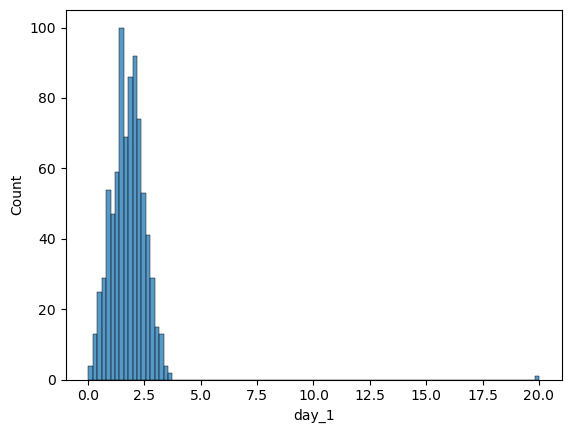

In [7]:
#| label: fig-hist-day1
#| fig-cap: "Distribution of Hygiene Score in Day 1"
day1_hist = sns.histplot(df_download['day_1'])
plt.show()

In [8]:
# Filter out the outlier
print(df_download[df_download['day_1'] > 5.0])

     ticket_no gender  day_1  day_2  day_3
610     4158.0    2.0  20.02   2.44    NaN


I filtered out this outlier, it's in row number `610`, and it turns out that based on the ranking, this lady was four times cleaner than the cleanest person at the music festival. Hmm… `4x cleaner`? Sounds like something you'd read on a box of laundry pods (see @fig-laundry-pod). Let's call her *Ms. Laundry Pod*.

![4x-cleaning-power](./4x-cleaning-power.jpg){#fig-laundry-pod}

**I’m just saying this for fun (except the Ms. Laundry Pod part). The hygiene score is an interval variable that we can’t simply multiply or divide the values like what I did.**

## Question 4
> How many cases have missing values for `day_2`?

**Answer:**

546 cases have missing values in the column `day_2`. 

**Solution:**

In [9]:
print(df_download.isnull().sum()['day_2'])

546


## Question 5
> Excluding the outlier in day 1. 

**Solution:**

Thankfully, there's only one outlier - Ms. Laundry Pod, located at row number `610`. So, for this part, I’ll simply exclude that row and save the remaining data to a new `DataFrame`.

In [10]:
df_download_dropped_outlier = df_download.drop(610)
# Or I could just enter the danger zone by dropping data on the DataFrame by:  
# df_download.drop(610, inplace=True)

Also, I did a double check by plotting the data once more (see @fig-hist-day1-revised). 

<Axes: >

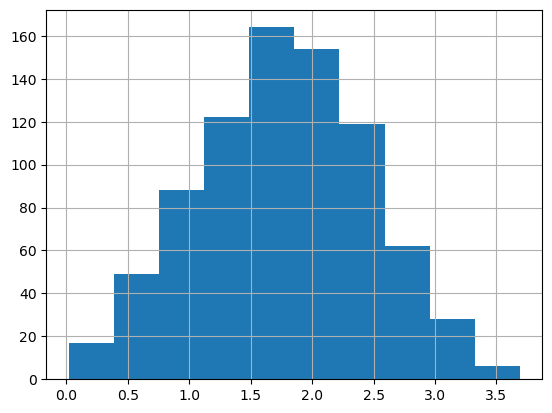

In [11]:
#| label: fig-hist-day1-revised
#| fig-cap: "Distribution of Hygiene Score in Day 1"
# Confirm if I'm in the right track. 
df_download_dropped_outlier['day_1'].hist()

[EOF]